# Neural Networks and Deep Learning, MDS HSE

## Homework 1. Fully Connected Neural Networks.

### General Information

### Grading and Penalties

The maximum possible grade for the assignment without bonuses is 10 points. Submitting the work after the hard deadline is not allowed.

Submitting after the soft deadline incurs a penalty of -1 point per day. Twice per semester (two modules), students are allowed to use an extension and submit by the hard deadline without penalty.

The assignment must be completed individually. “Similar” solutions will be considered plagiarism, and all involved students (including those whose work was copied) will receive no more than 0 points for the assignment. If you find a solution (or part of it) to any task from an open source, you must include a link to that source in a separate section at the end of your work (most likely you won’t be the only one who found it, so providing the link helps avoid suspicion of plagiarism).

Inefficient code implementation may negatively affect your grade. The grade may also be reduced for poorly readable code and poorly formatted plots. All answers must be accompanied by either code or comments explaining how they were obtained.

Use of generative models is allowed under the following conditions:
- The amount of code generated by such models does not exceed 30% of the total.
- You specify the model used and the prompt.
- At the end of your work, you include a **reflection on your experience using generative AI for this homework:  
  Describe how often you had to fix the code yourself or ask the model to correct something. Was it faster than writing the code on your own?

If these requirements are not met, the assignment will not be graded, and the maximum possible score is 0 points.

### About the Assignment

In this assignment, you will train a fully connected neural network to predict the release year of a song based on its audio features.  
For this, we will use the [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm.notebook import tqdm

plt.rcParams.update({"font.size": 16})
sns.set_style("whitegrid")
np.random.seed(0xFA1AFE1)

Let's start by downloading and loading the data:

In [2]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
urllib.request.urlretrieve(url, "data.txt.zip")

print("Downloaded!")

Downloaded!


In [2]:
df = pd.read_csv("data.txt.zip", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Let's look at the statistics based on the data.

In [3]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


The target variable, the year the song was released, is recorded in the first column. Let's look at its distribution.

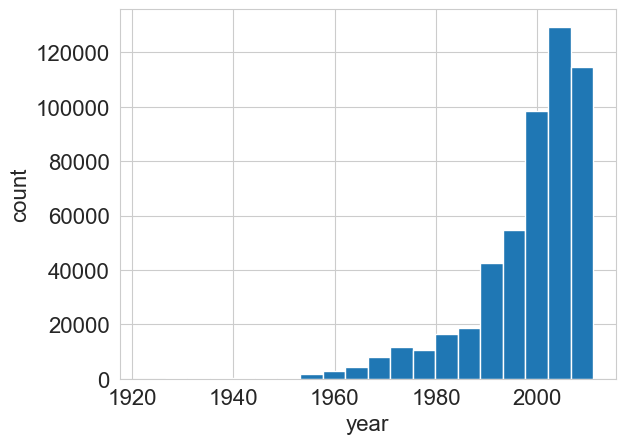

Range: 1922 - 2011
Unique values: 89


In [4]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel("year")
plt.ylabel("count")
plt.show()
print(f"Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}")
print(f"Unique values: {np.unique(df.iloc[:, 0]).size}")

Let's split the data into training and test sets (do not change anything here so that the split is the same for everyone).

In [5]:
X = df.iloc[:, 1:].values # the 90 audio features per song (input to the model)
y = df.iloc[:, 0].values # the release year of the song (what we want to predict)

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Task 0 (0 points, but if not completed, the maximum score for the entire assignment is 0 points).** We will use MSE as our metric. Before training neural networks, we need to check a few simple baselines so that we have something to compare more complex algorithms with. To do this, fit `Ridge` regression from `sklearn`. In addition, calculate the quality at the best constant prediction (also write down which constant will be best for MSE).

In [6]:
best_const = y_train.mean() # best const for MSE

In [7]:
y_pred_const = np.full_like(y_test, best_const)

In [8]:
mse_const = mean_squared_error(y_test, y_pred_const)

In [9]:
print(best_const, mse_const)

1998.3753660985026 117.83191164028968


In [10]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)

mse_ridge

89.74966397222077

**Answer:**

- Constant model:
    - Best const = 1998.38
    - MSE = 117.83

- Ridge regression:
    - MSE = 89.75

=> The optimal constant predictor (minimizing MSE) is the mean of the training years (1998.38). Its test MSE is 117.83, meaning it is off by approximately 10.85 years on average. Ridge regression achieves a much lower MSE of 89.75, which corresponds to around 9.47 years error. Therefore, Ridge provides a better baseline than the constant model.

Now let's start experimenting with neural networks. First, let's separate the validation from the data:

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0xE2E4
)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Part 1. Setting up a neural network (5 points)

**Task 1.1 (0.5 points).** Fill in the blanks in the `train_and_validate` function. It will help us run experiments. You can also implement GPU training support so that experiments are calculated faster. You can use GPUs for free on **Google Colab** and **Kaggle**.

In [13]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="train")
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label="val")
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label="train")
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label="val")

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale("log")

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale("log")

    for ax in axs:
        ax.set_xlabel("epoch")
        ax.legend()

    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("MSE")
    plt.show()


def train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=True,
):
    """
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}")
            if verbose
            else train_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):

            ###########################################

            optimizer.zero_grad() # reset gradients
            predictions = model(X_batch) # forward pass
            loss = criterion(predictions, y_batch) # compute loss
            loss.backward() # compute gradients
            optimizer.step() # update weights

            ###########################################

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
            if verbose
            else val_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                
                ###########################################

                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                ###########################################

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f"Validation MSE: {val_metrics[-1]:.3f}")

    return train_metrics[-1], val_metrics[-1]

**Task 1.2 (0.75 points).** Let's try to train our first neural network. Here, the target variable is discrete—it is the year the song was released. Therefore, we will train the network for classification using the [cross-entropy loss function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- For the network architecture, take two linear layers with ReLU activation between them and 128 hidden neurons.
- Use SGD with `lr=1e-2`.
- Take a mini-batch size of about 32-64; approximately 3-4 training epochs should be sufficient.
- You will most likely need `torch.utils.data.TensorDataset`. When converting numpy arrays to torch tensors, use the `torch.float32` type.
- Also, transform the target variable so that its values range from $0$ to $C-1$, where $C$ is the number of classes (it is better to pass the transformed value to TensorDataset, as we will still need the original one).
- As the `metric` parameter in `train_and_validate`, pass a lambda expression that calculates the MSE based on the neural network output and the target variable. In the case of classification, the class with the highest probability (or, equivalently, with the highest **logit**$^1$ value) is predicted.

$^1$ **Logit** — the output of the last linear layer, can take any real values. If Softmax is applied to logits, the probabilities of class distribution are obtained.

In [14]:
unique_years = np.sort(df.iloc[:, 0].unique())
year_to_class = {year: i for i, year in enumerate(unique_years)}
class_to_year = {i: year for i, year in enumerate(unique_years)}

y_train_cls = np.array([year_to_class[y] for y in y_train])
y_test_cls  = np.array([year_to_class[y] for y in y_test])
num_classes = len(unique_years)

num_classes

89

In [15]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train_cls, dtype=torch.long)
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test_cls, dtype=torch.long)

In [16]:
batch_size = 64

train_ds = TensorDataset(X_train_t, y_train_t)
val_ds   = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

In [17]:
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes),
        )

    def forward(self, x):
        return self.net(x)

model = MLP(input_dim=X_train.shape[1], hidden_dim=128, num_classes=num_classes)


In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

metric = lambda pred, target: ((pred.argmax(dim=1) - target)**2).float().mean()

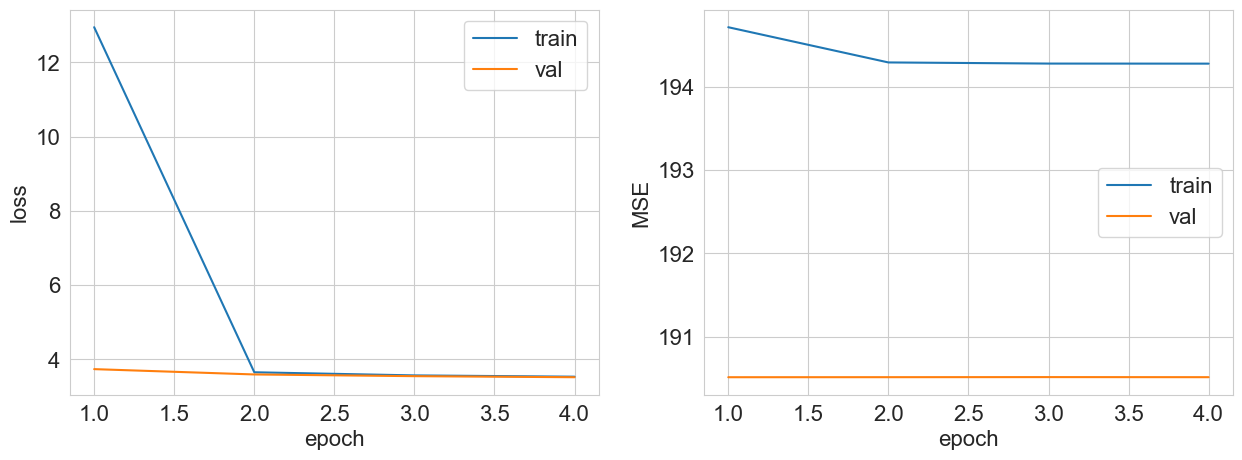

Validation MSE: 190.512
Train MSE: 194.27774155591254
Val MSE: 190.51243819710268


In [19]:
train_mse, val_mse = train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs=4,
    verbose=True
)

print("Train MSE:", train_mse)
print("Val MSE:", val_mse)

**Task 1.3 (0.5 points).** Comment on your observations. Were you able to beat the baseline? Do you think it is a good idea to train a classifier for this task? Why?

**Answer:** As we can see from the graphs and MSEs values, our neural network performs worse than Ridge regression since we couldn't beat the baseline. I do not think it is a good idea to train a classifier. The main reason for that is that classification with CrossEntropyLoss is not optimizing MSE. The output is the predicted class ID, which is basically an integer number from 0 to C-1. Cross-entropy does not try to minimize distance betgween class numbers, it only tries to assign probability to the correct class. Ridge regression, on the other hand, directly predicts a year. It has continuous output => optimizes MSE directly.

**Task 1.4 (0.75 points).** Now let's try to solve the problem as a regression. Train a neural network on [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Use the same training hyperparameters.
- When passing the target variable to TensorDataset, reshape it to (-1, 1).
- Don't forget to change the lambda expression that you pass to `train_and_validate`.
- If something goes wrong, you can try smaller values of `lr`.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

**Task 1.5 (0.5 points).** Were you able to stabilize the training? Did smaller `lr` values help? Did replacing classification with regression improve the results? Why do you think this is the case? As a hint, you can look at the distribution of the target variable and the magnitude of the feature values.

**Answer:** ...

**Task 1.6 (0.75 points).** Let's start by trying to normalize the target variable. To do this, we will use min-max normalization so that the target variable takes values from 0 to 1. Implement the `normalize` and `denormalize` functions, which, respectively, normalize the target variable and apply the inverse transformation. Estimate the minimum and maximum based on the training sample (i.e., these constants should be fixed and independent of the sample being passed).

In [ ]:
def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    pass


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    pass

Now repeat the experiment from **Task 1.4**, training on a normalized target variable. Let's also make one more change: add [sigmoid activation](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) after the last linear layer of the network. This way, we ensure that the neural network predicts numbers from the interval $[0, 1]$. Using activation is a fairly common technique when we want to obtain numbers from a specific range of values. 

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

**Task 1.7 (0.5 points).** Compare the results of this experiment with the previous run.

**Answer:** ...

** Task 1.8 (0.75 points).** This time, we will try to normalize not only the target variable, but also the data itself that is fed into the network. For this, we will use normalization via the mean and standard deviation. Transform the data and repeat the previous experiment. It probably makes sense to increase the number of training epochs.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

If you did everything correctly, you should have achieved a quality comparable to Ridge regression.

**Moral:** As you can see, we had to perform many intricate maneuvers to make the neural network perform at least as well as a simple linear model. Of course, this is an extreme case where the neural network simply cannot learn without data normalization. As a rule, it is not very difficult to get a neural network up and running out of the box, but getting it to work at full capacity is a much more laborious task. Writing pipelines for training neural network models requires great care, and debugging often turns into guesswork. Fortunately, intuition often comes to the rescue, and we hope that you will be able to develop it during our course. Let's start with two tips that are worth taking on board:

- Always start any experiments with baselines: without them, we would not understand that the neural network is not learning at all.
- When setting up experiments, try to make as few changes as possible at a time (ideally, just one!): this is the only way to understand which specific changes affect the result.

## Part 2. Improving the neural network (5 points)

Let's continue experimenting with the neural network to achieve even better quality.

**Task 2.1 (1 point).** Let's try other optimizers. Train the neural network using SGD+momentum and Adam. Describe your observations and use the best optimizer in future runs. For Adam, a smaller learning rate is usually taken, around $10^{-3}$.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

**Task 2.2 (1 point).** Now let's make our neural network more complex. Try to make the network:

- wider (i.e., increase the dimension of the hidden layer, for example, by making it twice as many)
- deeper (i.e., add another hidden layer)

Describe how increasing the number of model parameters affects the quality of the training and validation samples.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

**Task 2.3 (1 point).** As you may have noticed, the more complex model became more prone to overfitting. Let's try adding regularization to the training to combat overfitting. Add a dropout layer ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) with a parameter of $p=0.2$ after each linear layer except the last one. You can read about dropout in the following [blog post](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) or in the original [article](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf).

Describe the results. 

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

**Task 2.4 (1.5 points).** Now that we have decided on the neural network architecture, it's time to do the routine work of a DL engineer—searching through hyperparameters. Find the optimal value of lr based on the MSE value during validation (on a logarithmic scale, it is enough to look at 3-4 values). You can use `verbose=False` in the `train_and_validate` function.

We will also select the optimal value of the weight decay parameter for a given lr. Weight decay is analogous to L2 regularization for neural networks. You can read about it, for example, [here](https://paperswithcode.com/method/weight-decay). In PyTorch, it is set as the optimizer parameter `weight_decay`. Select the optimal weight decay value on a logarithmic grid (its typical values are in the range $[10^{-6}, 10^{-3}]$, but don't forget to include zero in the grid).

Plot graphs of the dependence of MSE on the training and validation sets on the parameter values. Comment on the resulting dependencies.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

As you may have noticed, another routine task for a DL engineer is the tedious wait for models to train.

**Task 2.5 (0.5 points).** We have conducted a large number of experiments and selected the optimal architecture and hyperparameters. Now it's time to train the model on the full training sample, measure its quality on the test sample, and compare it with the baselines. Do this. 

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ